# Graduation Lab: Week 6

### Dongju Han

Instructions: 
Let's build a kNN model using the college completion data. 
The data is messy and you have a degrees of freedom problem, as in, we have too many features.  

You've done most of the hard work already, so you should be ready to move forward with building your model. 

In [6]:
#imports 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler



### 1. Use the question/target variable you submitted and build a model to answer the question you created for this dataset (make sure it is a classification problem, convert if necessary). 

### Original Question From Previous Lab:
 * "Is there a correlation between institutional type and cohort size?"

### Recreated the Question: 
* "How well does my kNN model predict institutional type (Public/Private) based on student retention rate?"
* The Target Variable will be the institutional type

I recreated the question so that it is a classification problem.

In [7]:
grad_data = pd.read_csv('https://query.data.world/s/qpi2ltkz23yp2fcaz4jmlrskjx5qnp', encoding="cp1252")
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [8]:
#I will change the column name "Control" to "Institutional Type"
grad_data.rename(columns = {"control": "Institutional_Type"},inplace= True)
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   Institutional_Type                    3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [9]:
grad_data.Institutional_Type.value_counts()

Institutional_Type
Public                    1558
Private not-for-profit    1248
Private for-profit         992
Name: count, dtype: int64

In [10]:
grad_data.retain_value.value_counts()

retain_value
100.0    52
66.7     44
50.0     39
0.0      39
75.0     28
         ..
24.7      1
41.5      1
40.3      1
43.7      1
32.0      1
Name: count, Length: 649, dtype: int64

In [11]:
#I should combine Private not-for-profit and Private for-profit to Private
Private = ["Private not-for-profit", "Private for-profit"]
grad_data.Institutional_Type = grad_data.Institutional_Type.apply(lambda x: "Private" if x in Private else "Public")
grad_data.Institutional_Type.value_counts()

Institutional_Type
Private    2240
Public     1558
Name: count, dtype: int64

In [12]:
#Change objects to categorical variables (only the ones that are necessary)
cat = ["level", "Institutional_Type"]
grad_data[cat] = grad_data[cat].astype("category")
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   unitid                                3798 non-null   int64   
 1   chronname                             3798 non-null   object  
 2   city                                  3798 non-null   object  
 3   state                                 3798 non-null   object  
 4   level                                 3798 non-null   category
 5   Institutional_Type                    3798 non-null   category
 6   basic                                 3798 non-null   object  
 7   hbcu                                  94 non-null     object  
 8   flagship                              50 non-null     object  
 9   long_x                                3798 non-null   float64 
 10  lat_y                                 3798 non-null   float64 
 11  site

In [13]:
has_na = grad_data["Institutional_Type"].isna().any() #False
grad_data = grad_data.dropna(subset=['retain_percentile'])


In [14]:
has_na1 = grad_data["retain_percentile"].isna().sum() 
print(has_na1)

0


In [15]:
# Check unique values for unusual strings that might represent missing data
for column in grad_data.columns:
    print(f"{column}: {grad_data[column].unique()}")

# Convert potential string-encoded missing values to NaN
grad_data.replace(['NA', 'na', 'null', 'None', 'NaN', " "], pd.NA, inplace=True)

# Now check again for any NaNs
print(grad_data.isna().sum())


unitid: [100654 100663 100690 ... 462354 466921 474881]
chronname: ['Alabama A&M University' 'University of Alabama at Birmingham'
 'Amridge University' ... 'John Paul the Great Catholic University'
 'Chamberlain College of Nursing-Missouri' 'Minneapolis Media Institute']
city: ['Normal' 'Birmingham' 'Montgomery' ... 'Baraga' 'Escondido' 'Edina']
state: ['Alabama' 'Alaska' 'Arizona' 'New Mexico' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Virginia'
 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Missouri' 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
level: ['4-year', '2-year']
Categories 

In [16]:
# List column names that have missing values
missing_values_count = grad_data.isna().sum()
print("Missing Values Count per Column:")
print(missing_values_count)
columns_with_na = missing_values_count[missing_values_count > 0].index.tolist()
grad_data = grad_data.drop(columns = columns_with_na)

Missing Values Count per Column:
unitid                0
chronname             0
city                  0
state                 0
level                 0
                   ... 
state_sector_ct       0
carnegie_ct           0
counted_pct         378
nicknames          3225
cohort_size         155
Length: 62, dtype: int64


In [17]:
objects = grad_data.dtypes[grad_data.dtypes == "object"].index
print(objects)
grad_data = grad_data.drop(columns = objects)

Index(['chronname', 'city', 'state', 'basic'], dtype='object')


In [18]:
print(grad_data.isna().any())

unitid                    False
level                     False
Institutional_Type        False
long_x                    False
lat_y                     False
student_count             False
awards_per_value          False
awards_per_state_value    False
awards_per_natl_value     False
exp_award_value           False
exp_award_state_value     False
exp_award_natl_value      False
exp_award_percentile      False
ft_pct                    False
fte_value                 False
fte_percentile            False
retain_value              False
retain_percentile         False
state_sector_ct           False
carnegie_ct               False
dtype: bool


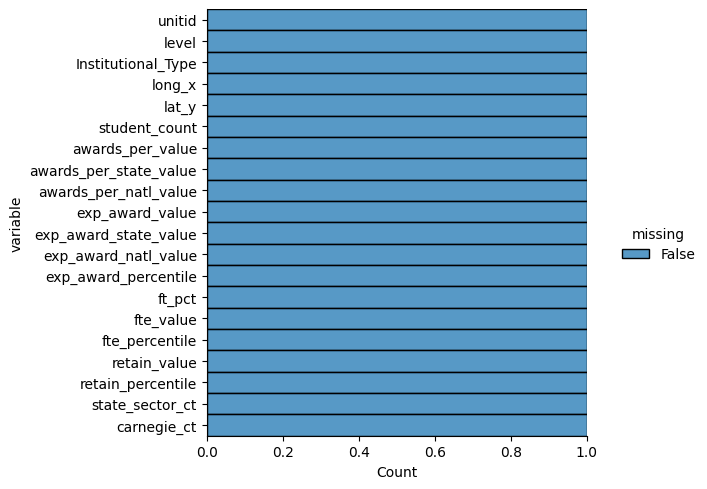

In [19]:
#Missing Data? 
sns.displot(
    data=grad_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

#No Missing Data

In [20]:
numeric_cols = grad_data.select_dtypes(include='int64').columns
print(numeric_cols)

Index(['unitid', 'student_count', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'exp_award_percentile', 'fte_value',
       'fte_percentile', 'state_sector_ct', 'carnegie_ct'],
      dtype='object')


In [21]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(grad_data[numeric_cols])   # conduct data transformation
scaled_df = pd.DataFrame(d, columns=numeric_cols)   # convert back to pd df; transformation converts to array
grad_data[numeric_cols] = scaled_df   # put data back into the main df

In [22]:
grad_data.describe()

,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,retain_value,retain_percentile,state_sector_ct,carnegie_ct
count,3326.000000,3535.000000,3535.000000,3326.000000,3535.000000,3535.000000,3535.000000,3326.000000,3326.000000,3326.000000,3326.000000,3535.000000,3326.000000,3326.000000,3535.000000,3535.000000,3326.000000,3326.000000
mean,0.313090,-90.873028,38.209037,0.027451,22.844356,22.720537,22.377369,0.012790,0.285105,0.486698,0.513584,71.451598,0.030549,0.508900,66.231853,49.226591,0.294735,0.458076
std,0.261964,15.698247,4.967601,0.043960,10.158918,6.407894,4.909072,0.021451,0.192592,0.393676,0.288900,25.165240,0.048278,0.289576,17.033907,29.175248,0.250042,0.298001
min,0.000000,-159.395966,19.699720,0.000000,0.500000,3.200000,16.500000,0.000000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005814
25%,0.145058,-97.228285,34.439137,0.003938,17.000000,19.000000,16.500000,0.006364,0.139913,0.168790,0.270000,49.800000,0.005470,0.260000,56.100000,24.000000,0.113043,0.203488
50%,0.254967,-86.799304,39.054414,0.011383,21.100000,22.000000,22.500000,0.009964,0.240557,0.181568,0.520000,78.000000,0.013491,0.510000,66.900000,49.000000,0.208696,0.325581
75%,0.341620,-79.694875,41.638864,0.032227,25.600000,24.200000,22.500000,0.015115,0.382101,1.000000,0.760000,94.400000,0.035180,0.760000,78.100000,75.000000,0.408696,0.662791
max,1.000000,-67.243306,71.324702,1.000000,131.100000,59.900000,32.800000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000


In [23]:
cat_cols = grad_data.select_dtypes(include='category').columns
encoded = pd.get_dummies(grad_data[cat_cols])
encoded.head()   
#I realized that other object variables had too many value counts so I decided to only one hot encode
#level and Institutional Type column

,level_2-year,level_4-year,Institutional_Type_Private,Institutional_Type_Public
0,False,True,False,True
1,False,True,False,True
2,False,True,True,False
3,False,True,False,True
4,False,True,False,True


In [24]:
grad_data = grad_data.drop(cat_cols, axis=1)
grad_data = grad_data.join(encoded)

In [25]:
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3535 entries, 0 to 3796
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unitid                      3326 non-null   float64
 1   long_x                      3535 non-null   float64
 2   lat_y                       3535 non-null   float64
 3   student_count               3326 non-null   float64
 4   awards_per_value            3535 non-null   float64
 5   awards_per_state_value      3535 non-null   float64
 6   awards_per_natl_value       3535 non-null   float64
 7   exp_award_value             3326 non-null   float64
 8   exp_award_state_value       3326 non-null   float64
 9   exp_award_natl_value        3326 non-null   float64
 10  exp_award_percentile        3326 non-null   float64
 11  ft_pct                      3535 non-null   float64
 12  fte_value                   3326 non-null   float64
 13  fte_percentile              3326 non-n

In [26]:
grad_data = grad_data.dropna()

In [27]:
# Using isna() and sum() to count missing values per column
missing_values_per_column = grad_data.isna().sum()

# Print the counts of missing values per column
print(missing_values_per_column)

# If you want to check the total number of missing values in the DataFrame
total_missing_values = grad_data.isna().sum().sum()
print(f"Total missing values in the DataFrame: {total_missing_values}")


unitid                        0
long_x                        0
lat_y                         0
student_count                 0
awards_per_value              0
awards_per_state_value        0
awards_per_natl_value         0
exp_award_value               0
exp_award_state_value         0
exp_award_natl_value          0
exp_award_percentile          0
ft_pct                        0
fte_value                     0
fte_percentile                0
retain_value                  0
retain_percentile             0
state_sector_ct               0
carnegie_ct                   0
level_2-year                  0
level_4-year                  0
Institutional_Type_Private    0
Institutional_Type_Public     0
dtype: int64
Total missing values in the DataFrame: 0


### 2. Build a kNN model to predict your target variable using 3 nearest neighbors. Make sure it is a classification problem, meaning if needed changed the target variable.

In [28]:
grad_data['Institutional_Type_Public'].value_counts()[1] / grad_data['Institutional_Type_Public'].count()


/tmp/ipykernel_42408/4220521448.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grad_data['Institutional_Type_Public'].value_counts()[1] / grad_data['Institutional_Type_Public'].count()


np.float64(0.45009019843656045)

In [29]:
"""
X = grad_data.drop(['Institutional_Type_Public'], axis=1).values   # independent variables
y = grad_data['Institutional_Type_Public'].values                  # dependent variable
"""

train, test = train_test_split(grad_data,  test_size=0.4, stratify = grad_data['Institutional_Type_Public']) 

In [30]:
test, val = train_test_split(test, test_size=0.5, stratify=test['Institutional_Type_Public'])

In [31]:
print(grad_data.columns)

Index(['unitid', 'long_x', 'lat_y', 'student_count', 'awards_per_value',
       'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value',
       'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile',
       'ft_pct', 'fte_value', 'fte_percentile', 'retain_value',
       'retain_percentile', 'state_sector_ct', 'carnegie_ct', 'level_2-year',
       'level_4-year', 'Institutional_Type_Private',
       'Institutional_Type_Public'],
      dtype='object')


In [32]:
import random 
random.seed(330)

X_train = train.drop(['Institutional_Type_Public'], axis=1).values
y_train = train['Institutional_Type_Public'].values

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#Accuracy of the Test Data
X_test = test.drop(['Institutional_Type_Public'], axis=1).values
y_test = test['Institutional_Type_Public'].values

neigh.score(X_test, y_test)

0.825563909774436

In [34]:
#Accuracy of Validation Data
X_val = val.drop(['Institutional_Type_Public'], axis=1).values
y_val = val['Institutional_Type_Public'].values

neigh.score(X_val, y_val)

0.8753753753753754

### 3. Create a dataframe that includes the test target values, test predicted values, and test probabilities of the positive class.

In [35]:
y_pred = neigh.predict(X_test)
y_probs = neigh.predict_proba(X_test)[:, 1] 

In [36]:
accuracy_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Probabilities" : y_probs
})

print(accuracy_df.head())

   Actual  Predicted  Probabilities
0    True       True       0.666667
1    True       True       1.000000
2   False      False       0.000000
3   False      False       0.000000
4   False      False       0.000000


### 4. No code question: If you adjusted the k hyperparameter what do you think would happen to the threshold function? Would the confusion look the same at the same threshold levels or not? Why or why not?

If I adjust the k hyperparameter, it would significantly impact the data. If the k value gets larger, it will reduce the variance of the predictions and make the model more reliable, but it will underfit the data. If k value gets too small, it will overfit the data as it will be more sensitive to the noise of the data. If the k value is small, sensitivity(True Positive) will increase yet the specificity(True Negative) will decrease and vice versa if the k value is large. Due to these reason, if k changes, the confusion will not look the same and the values will be adjusted. 

### 5. Evaluate the results using the confusion matrix. Then "walk" through your question, summarize what concerns or positive elements do you have about the model as it relates to your question? 

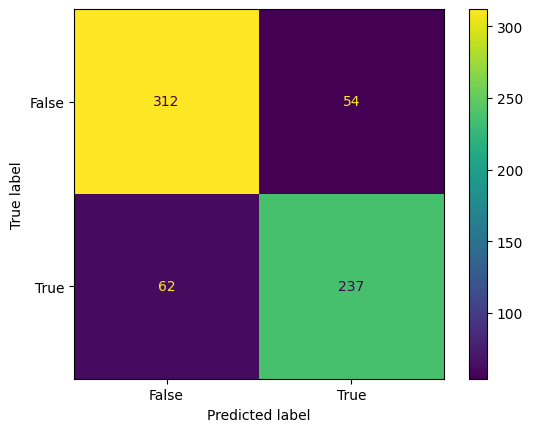

In [37]:
cm = confusion_matrix(y_test,y_pred, labels=neigh.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)  
disp.plot()
plt.show()

In [38]:
sensitivity = 234/(234+65)   # = TP/(TP+FN)
specificity = 310/(310+56)   # = TN/(TN+FP)
print(sensitivity, specificity)

0.782608695652174 0.8469945355191257


Although the kNN model enhanced the accuracy of predicting, I believe that the value could be more increased. (Sensitivity is around 0.78 and specificity is around 0.85) The fact that the specificity is higher than the sensitivity could mean k value is too large. 

### 6. Create two functions: One that cleans the data & splits into training|test and one that allows you to train and test the model with different k and threshold values, then use them to optimize your model (test your model with several k and threshold combinations). Try not to use variable names in the functions, but if you need to that's fine. (If you can't get the k function and threshold function to work in one function just run them separately.) 

In [39]:
def clean_and_split_data(df, target, test_size=0.4, val_size=0.5, random_state=330):

    # Rename and recategorize 'control' to 'Institutional_Type'
    df.rename(columns={"control": "Institutional_Type"}, inplace=True)
    Private = ["Private not-for-profit", "Private for-profit"]
    df['Institutional_Type'] = df['Institutional_Type'].apply(lambda x: "Private" if x in Private else "Public")

    # Convert specified categories to type "category"
    cat_cols = ["level", "Institutional_Type"]
    df[cat_cols] = df[cat_cols].astype("category")

    # Drop columns with dtype 'object' that are not in 'cat_cols'
    df = df.drop(columns=df.select_dtypes(include='object').columns.difference(cat_cols))

    # Convert potential string-encoded missing values to NaN
    df.replace(['NA', 'na', 'null', 'None', 'NaN', " "], pd.NA, inplace=True)
    missing_values_count = df.isna().sum()
    columns_with_na = missing_values_count[missing_values_count > 0].index.tolist()
    df = df.drop(columns = columns_with_na)


    # Normalize numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols)

    target_columns = [col for col in df.columns if col.startswith(target)]

    X = df.drop(target_columns, axis=1)
    y = df[target_columns]  # Adjust based on the specific target column needed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    return X_train, X_test, y_train, y_test


In [40]:
def evaluate_knn(X_train, y_train, X_test, y_test):

    k_values = range(1, 22, 2)
    accuracies = []
    
    # Loop over k values
    for k in k_values:
        print(f"Calculating for k = {k}") 
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)  
        accuracies.append(accuracy)
    
    # Create a DataFrame with k values and their corresponding accuracies
    results_df = pd.DataFrame({
        'k': k_values,
        'Accuracy': accuracies
    })
    
    return results_df

In [41]:
X_train, X_test, y_train, y_test = clean_and_split_data(grad_data, "Institutional_Type")
results_df = evaluate_knn(X_train, y_train.values.ravel(), X_test, y_test.values.ravel()) 
print(results_df)

KeyError: 'Institutional_Type'

### 7. How well does the model perform? Did the interaction of the adjusted thresholds and k values help the model? Why or why not? 


I believe that the function had some problems on cleaning the data. When I run the model with k=3, the accuracy of validation data was around 0.86. With the function, the fact that I got 1.0 for all k values means that my kNN model is performing exceptionally well across all of these k values which I highly doubt.

In [42]:
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k")    # I'll include this so you can see the progress of the function as it runs
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accu = class_knn.score(X_test, y_test)
    return accu

test = pd.DataFrame({'k':list(range(1,22,2)), 
    'accu':[chooseK(x, X_train, y_train, X_test, y_test) for x in list(range(1, 22, 2))]})

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k


In [43]:
test

,k,accu
0,1,0.840602
1,3,0.825564
2,5,0.818045
3,7,0.816541
4,9,0.831579
5,11,0.831579
6,13,0.828571
7,15,0.839098
8,17,0.840602
9,19,0.834586


Without using the function, when I run through the various k values, it seems like k=1 has the highest accuracy. This means that the noise or outliers do not exist or does not significantly impact the model and the data points are very close to each other.

### 8. Choose another variable as the target in the dataset and create another kNN model using the two functions you created in step 7. 

In [ ]:
X_train, X_test, y_train, y_test = clean_and_split_data(grad_data, "level")
results_df = evaluate_knn(X_train, y_train.values.ravel(), X_test, y_test.values.ravel()) 
print(results_df)

Calculating for k = 1


ValueError: Found input variables with inconsistent numbers of samples: [2278, 4556]